In [1]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb

import datetime
from tqdm import tqdm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.0 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("churn.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

# EDA

## Missing values and duplicates

In [5]:
#checking missing values
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Columns with NaNs: []


In [6]:
#checking dups
duplicates_count = df.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


In [7]:
# Number of unique values in each feature
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#split data set into numerical and categorical
numerical_features = list(df.select_dtypes(exclude=['object']).columns)
categorical_features = list(filter(lambda x: x not in numerical_features,list(df.columns)))

## Skewness

In [10]:
# Check skewness
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Outliers

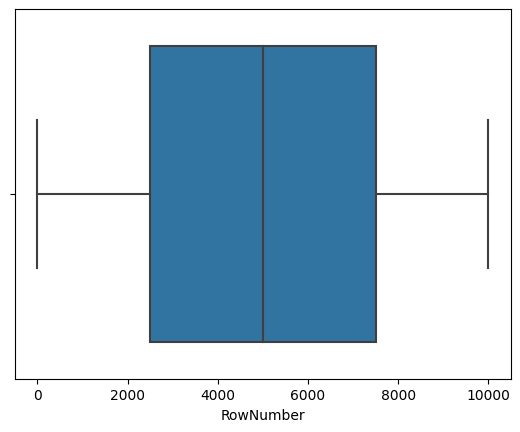

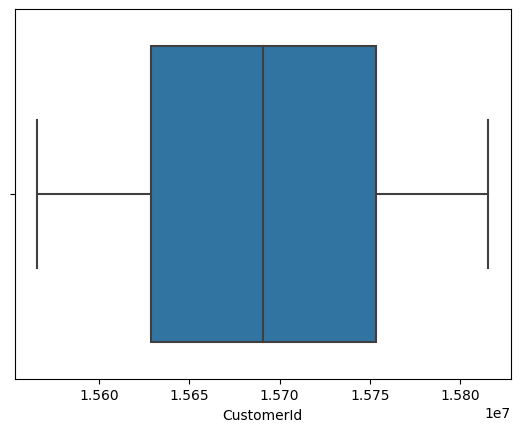

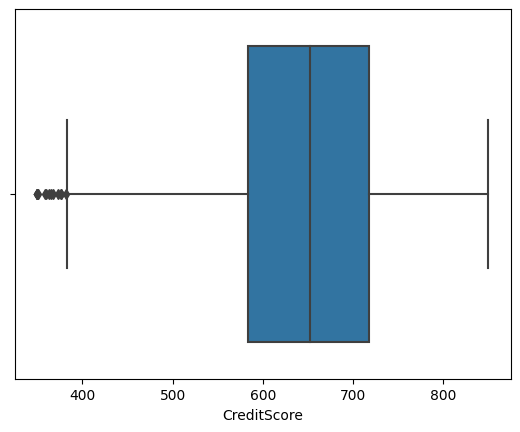

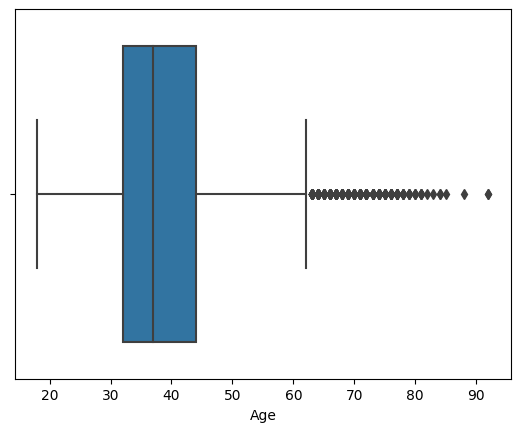

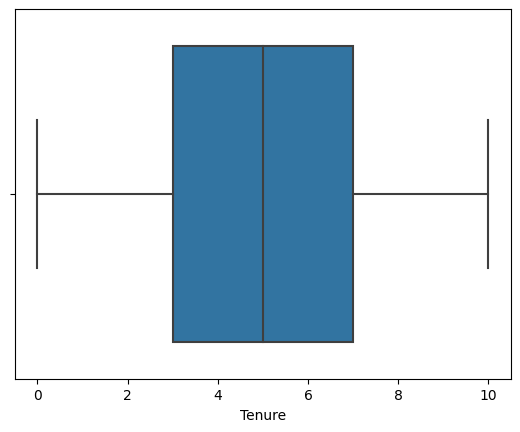

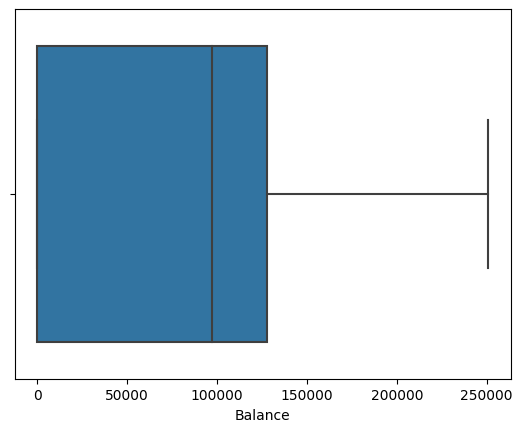

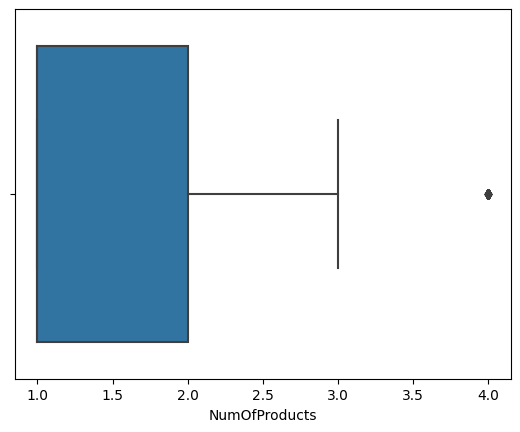

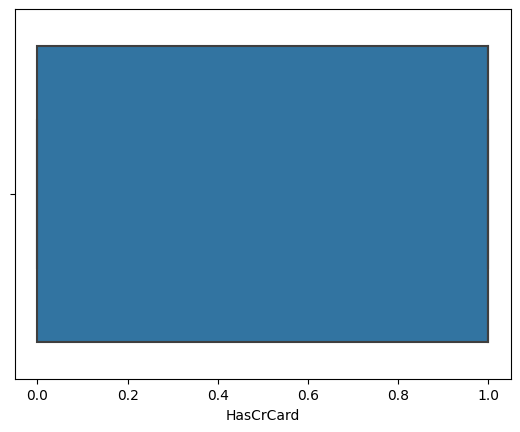

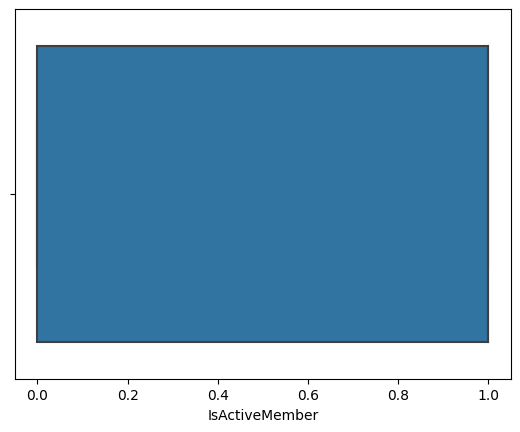

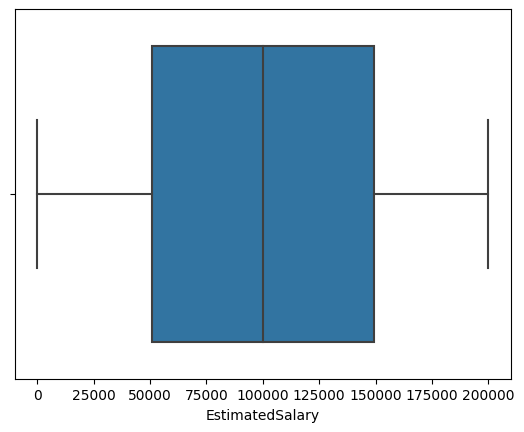

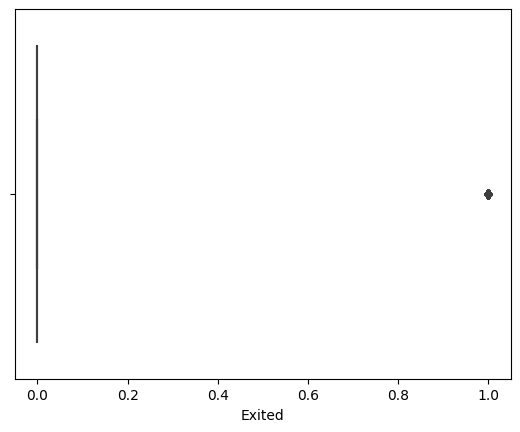

In [11]:
#Checking outliers
for col in numerical_features:
    sns.boxplot(data=df,x=col)
    plt.show()

## Balanced

In [12]:
# Balance
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Descriptive Statistics

In [13]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)

# Examine the skewness of each feature using pandas .skew
print("\n SKEWNESS\n",df.skew())

# Observation: skewness is a problem for many columns and should be corrected

UNIVARIATE DESCRIPTIVE STAT using pandas
                    count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000

CORRELATION MATRIX
                  RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumbe

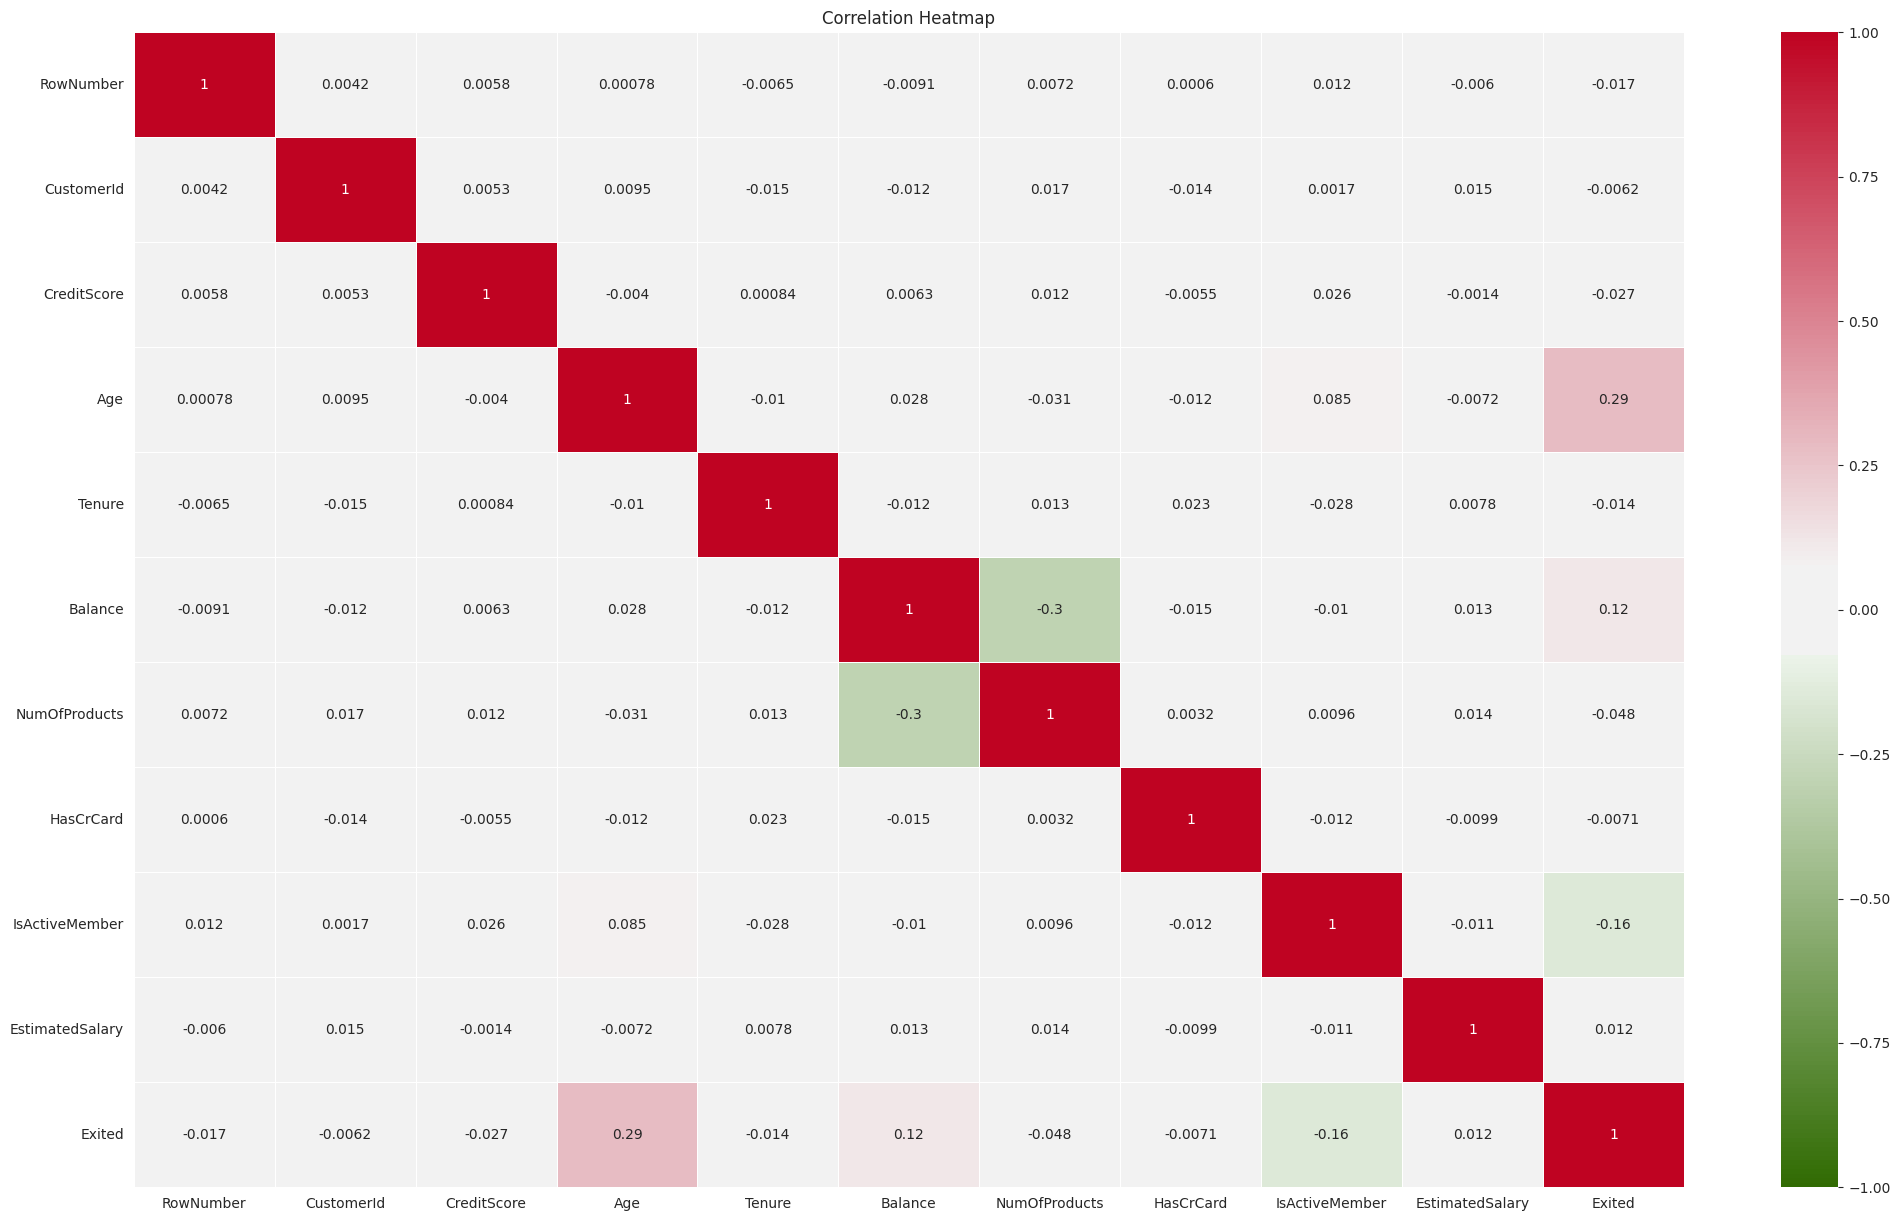

In [14]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (25,15))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocess

## Drop columns

In [15]:
# dropping 3 useless columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding

In [16]:
numerical_features

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [17]:
categorical_features

['Surname', 'Geography', 'Gender']

In [18]:
# encoding Geography and Gender features
df = pd.get_dummies(data=df, columns=['Geography', 'Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Skewness Correct

In [19]:
def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF

In [20]:
# Extract predictors and target from df
X = df.drop(['Exited'],axis=1)
y = df['Exited']


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'CreditScore' . Skewness = -0.07


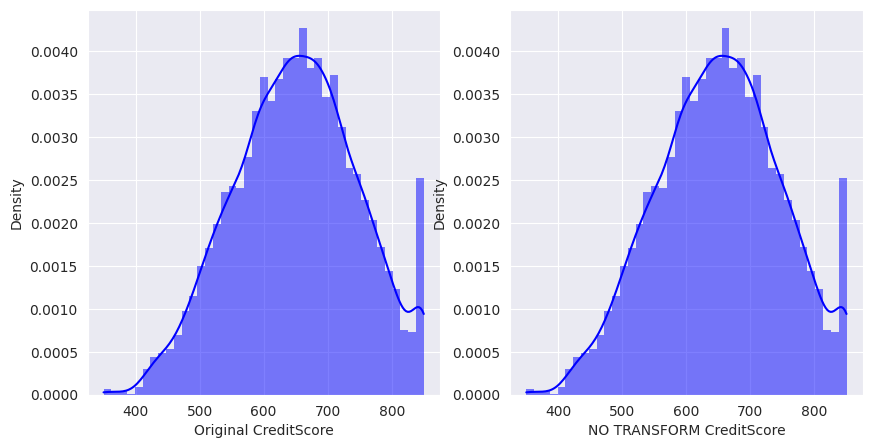


 ------------------------------------------------------

 'Age' had 'positive' skewness of 1.01

 Transformation yielded skewness of -0.00


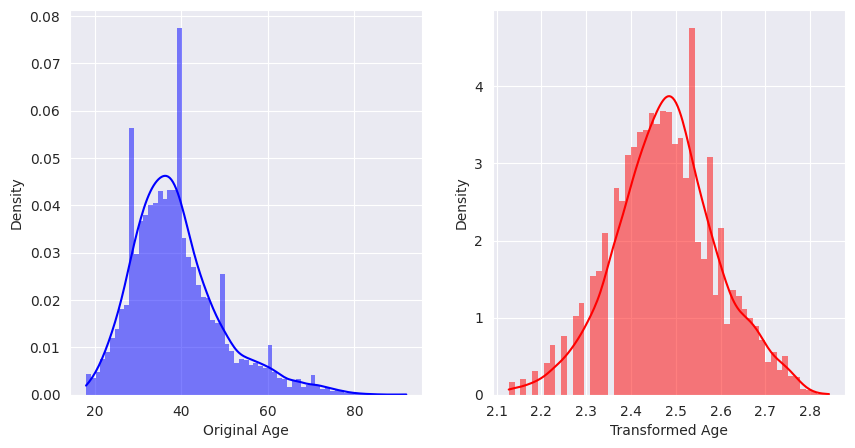


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Tenure' . Skewness = 0.01


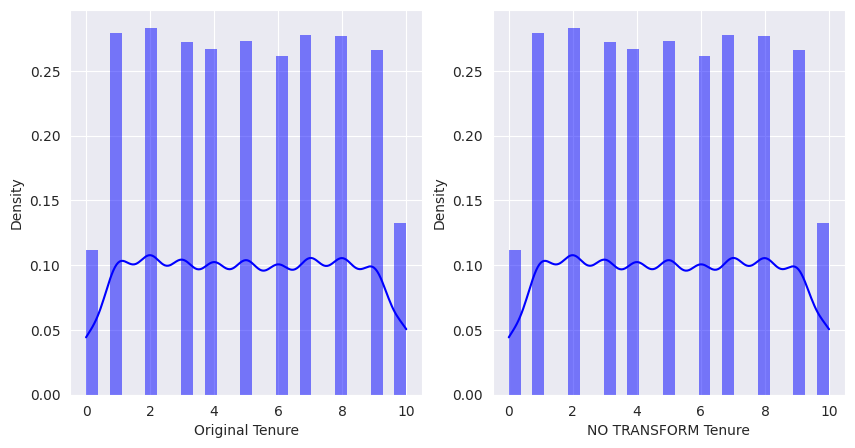


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Balance' . Skewness = -0.14


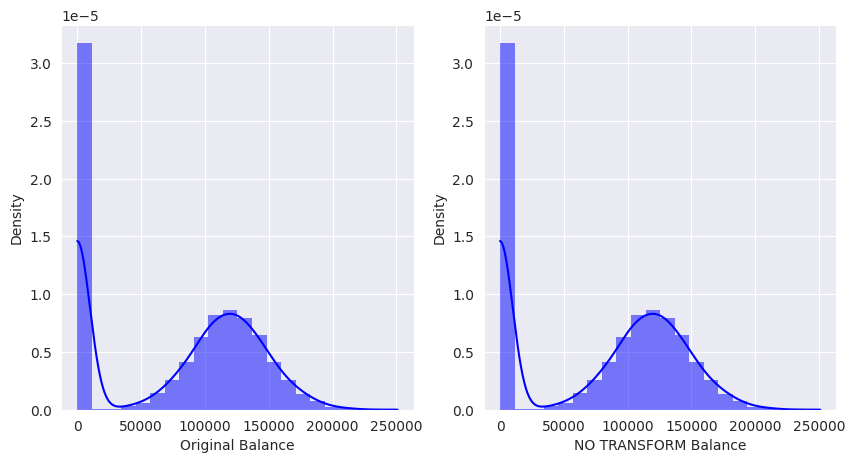


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'NumOfProducts' . Skewness = 0.75


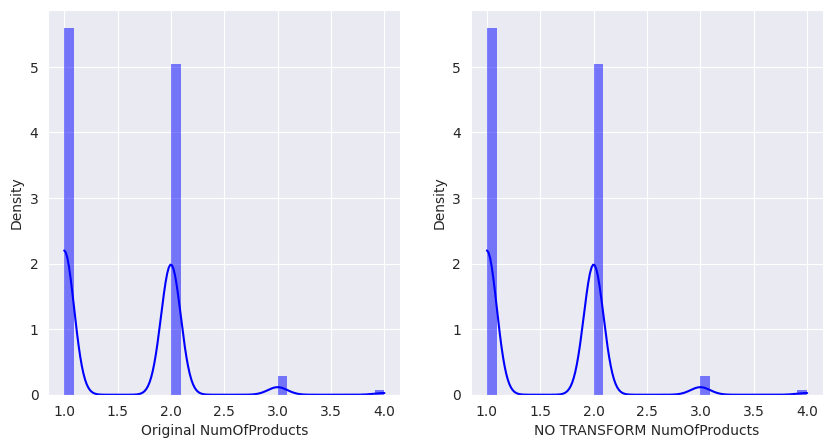


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'HasCrCard' . Skewness = -0.90


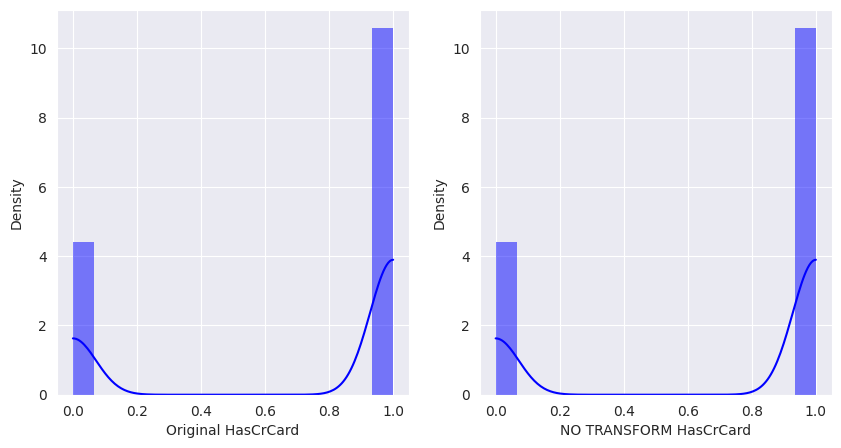


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'IsActiveMember' . Skewness = -0.06


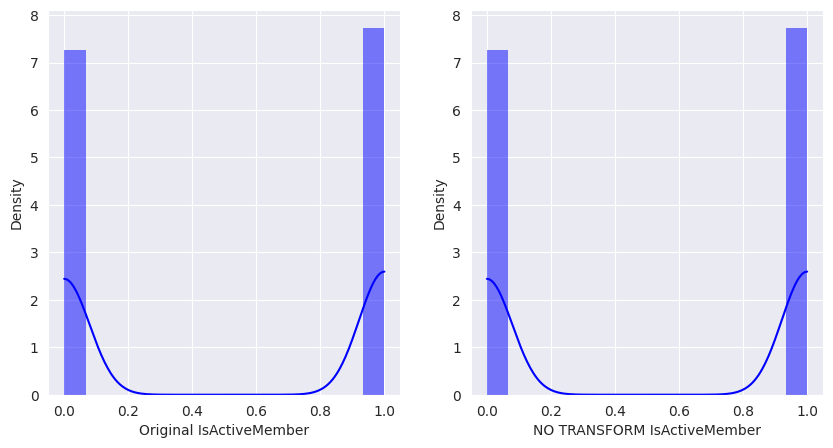


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'EstimatedSalary' . Skewness = 0.00


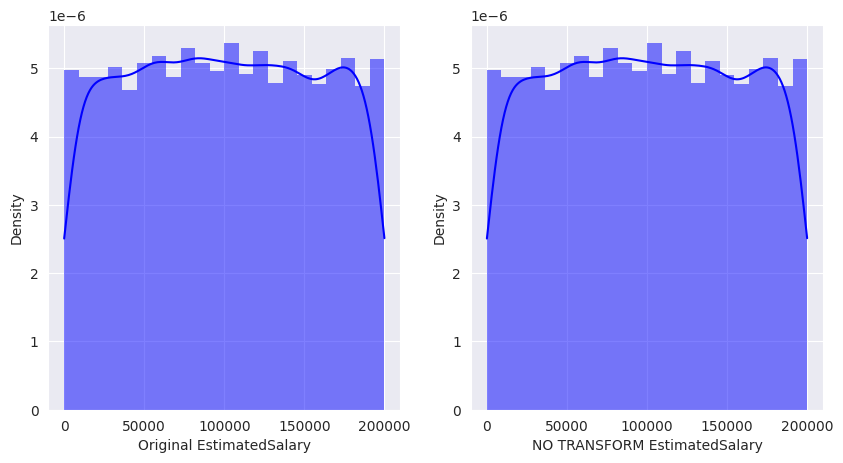


 ------------------------------------------------------

 'Geography_Germany' had 'positive' skewness of 1.15

 Transformation yielded skewness of 1.15


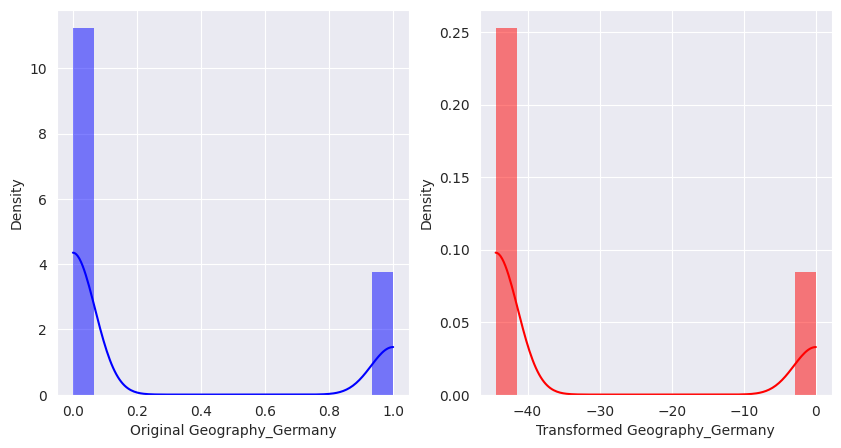


 ------------------------------------------------------

 'Geography_Spain' had 'positive' skewness of 1.17

 Transformation yielded skewness of 1.17


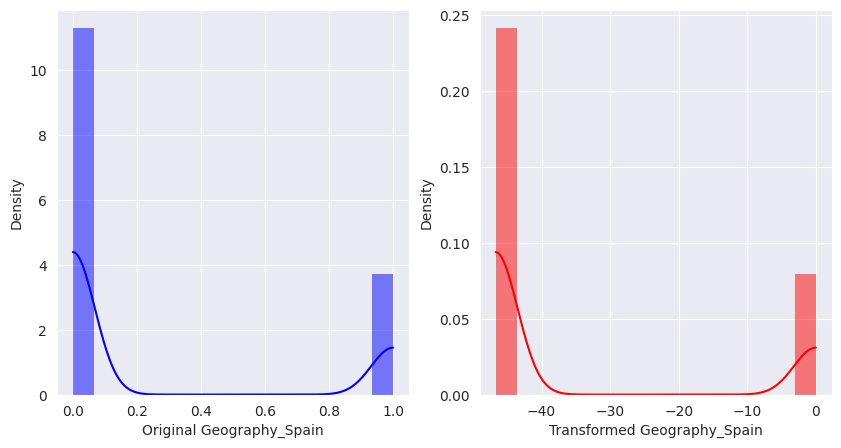


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Gender_Male' . Skewness = -0.18


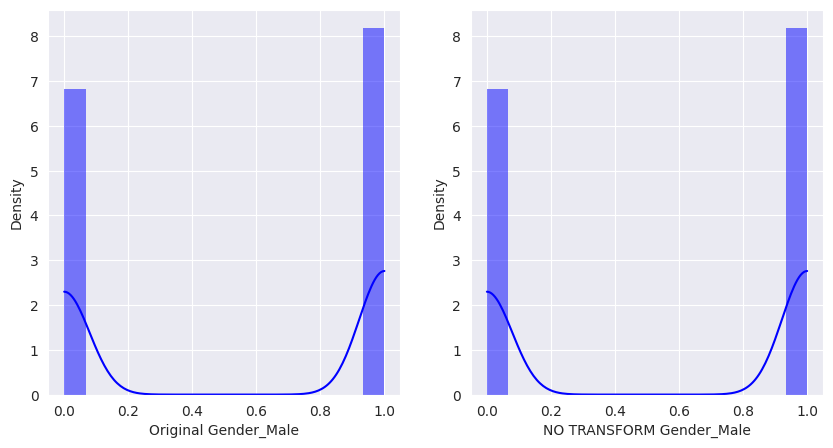

In [21]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

## Outliers Transformation

In [22]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.
from scipy.stats.mstats import winsorize
cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Descriptive Statistics Before", X.describe())
X_quant_winsorized = X.copy(deep=True)
for i in cols:
  X_quant_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("Descriptive Statistics After", X_quant_winsorized.describe())

Column  CreditScore :  [7, 942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 5494, 8154, 8723, 8762, 9210, 9356, 9624]
Column  Age :  [57, 85, 233, 252, 310, 371, 746, 766, 888, 923, 1055, 1064, 1205, 1327, 1614, 1619, 1678, 1685, 1730, 1790, 1905, 1933, 2002, 2012, 2021, 2108, 2136, 2141, 2164, 2250, 2311, 2433, 2458, 2497, 2669, 2832, 2855, 2925, 2945, 2990, 3030, 3033, 3095, 3110, 3142, 3201, 3239, 3295, 3330, 3366, 3387, 3499, 3512, 3517, 3531, 3568, 3602, 3631, 3651, 3686, 3691, 3826, 3942, 3994, 3999, 4024, 4162, 4218, 4256, 4273, 4318, 4330, 4366, 4395, 4501, 4556, 4571, 4590, 4644, 4716, 4727, 4770, 4792, 4815, 4832, 4931, 4951, 5068, 5097, 5102, 5218, 5254, 5289, 5490, 5508, 5592, 5647, 5874, 5957, 5997, 6003, 6167, 6244, 6319, 6413, 6443, 6530, 6546, 6721, 6759, 6887, 7046, 7063, 7243, 7272, 7334, 7375, 7390, 7451, 7456, 7526, 7552, 7625, 7692, 7722, 7768, 7788, 7847, 7956, 8217, 8517, 8522, 8584, 8645, 8786, 9006, 9029, 9080, 9136, 9246, 9258, 9292, 9309, 9331, 9333, 9472, 9490

## Oversampling

In [23]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
# SMOTE (oversampling)
# Data is unbalanced (20.37% positive instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

print("Shape before SMOTE: ", X.shape, y.shape, "\n")
print("Shape after SMOTE: ", X_SMOTE.shape, y_SMOTE.shape, "\n")

imblearn version:  0.10.1
Shape before SMOTE:  (10000, 11) (10000,) 

Shape after SMOTE:  (15926, 11) (15926,) 



In [25]:
#checking dups
df_SMOTE = pd.concat([X_SMOTE, y_SMOTE], axis=1)
duplicates_count = df_SMOTE.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


## Standardization

In [26]:
stdsc = StandardScaler()  
X_SMOTE_std = stdsc.fit_transform(X_SMOTE)

# Strength of Predictors

## Pairplot

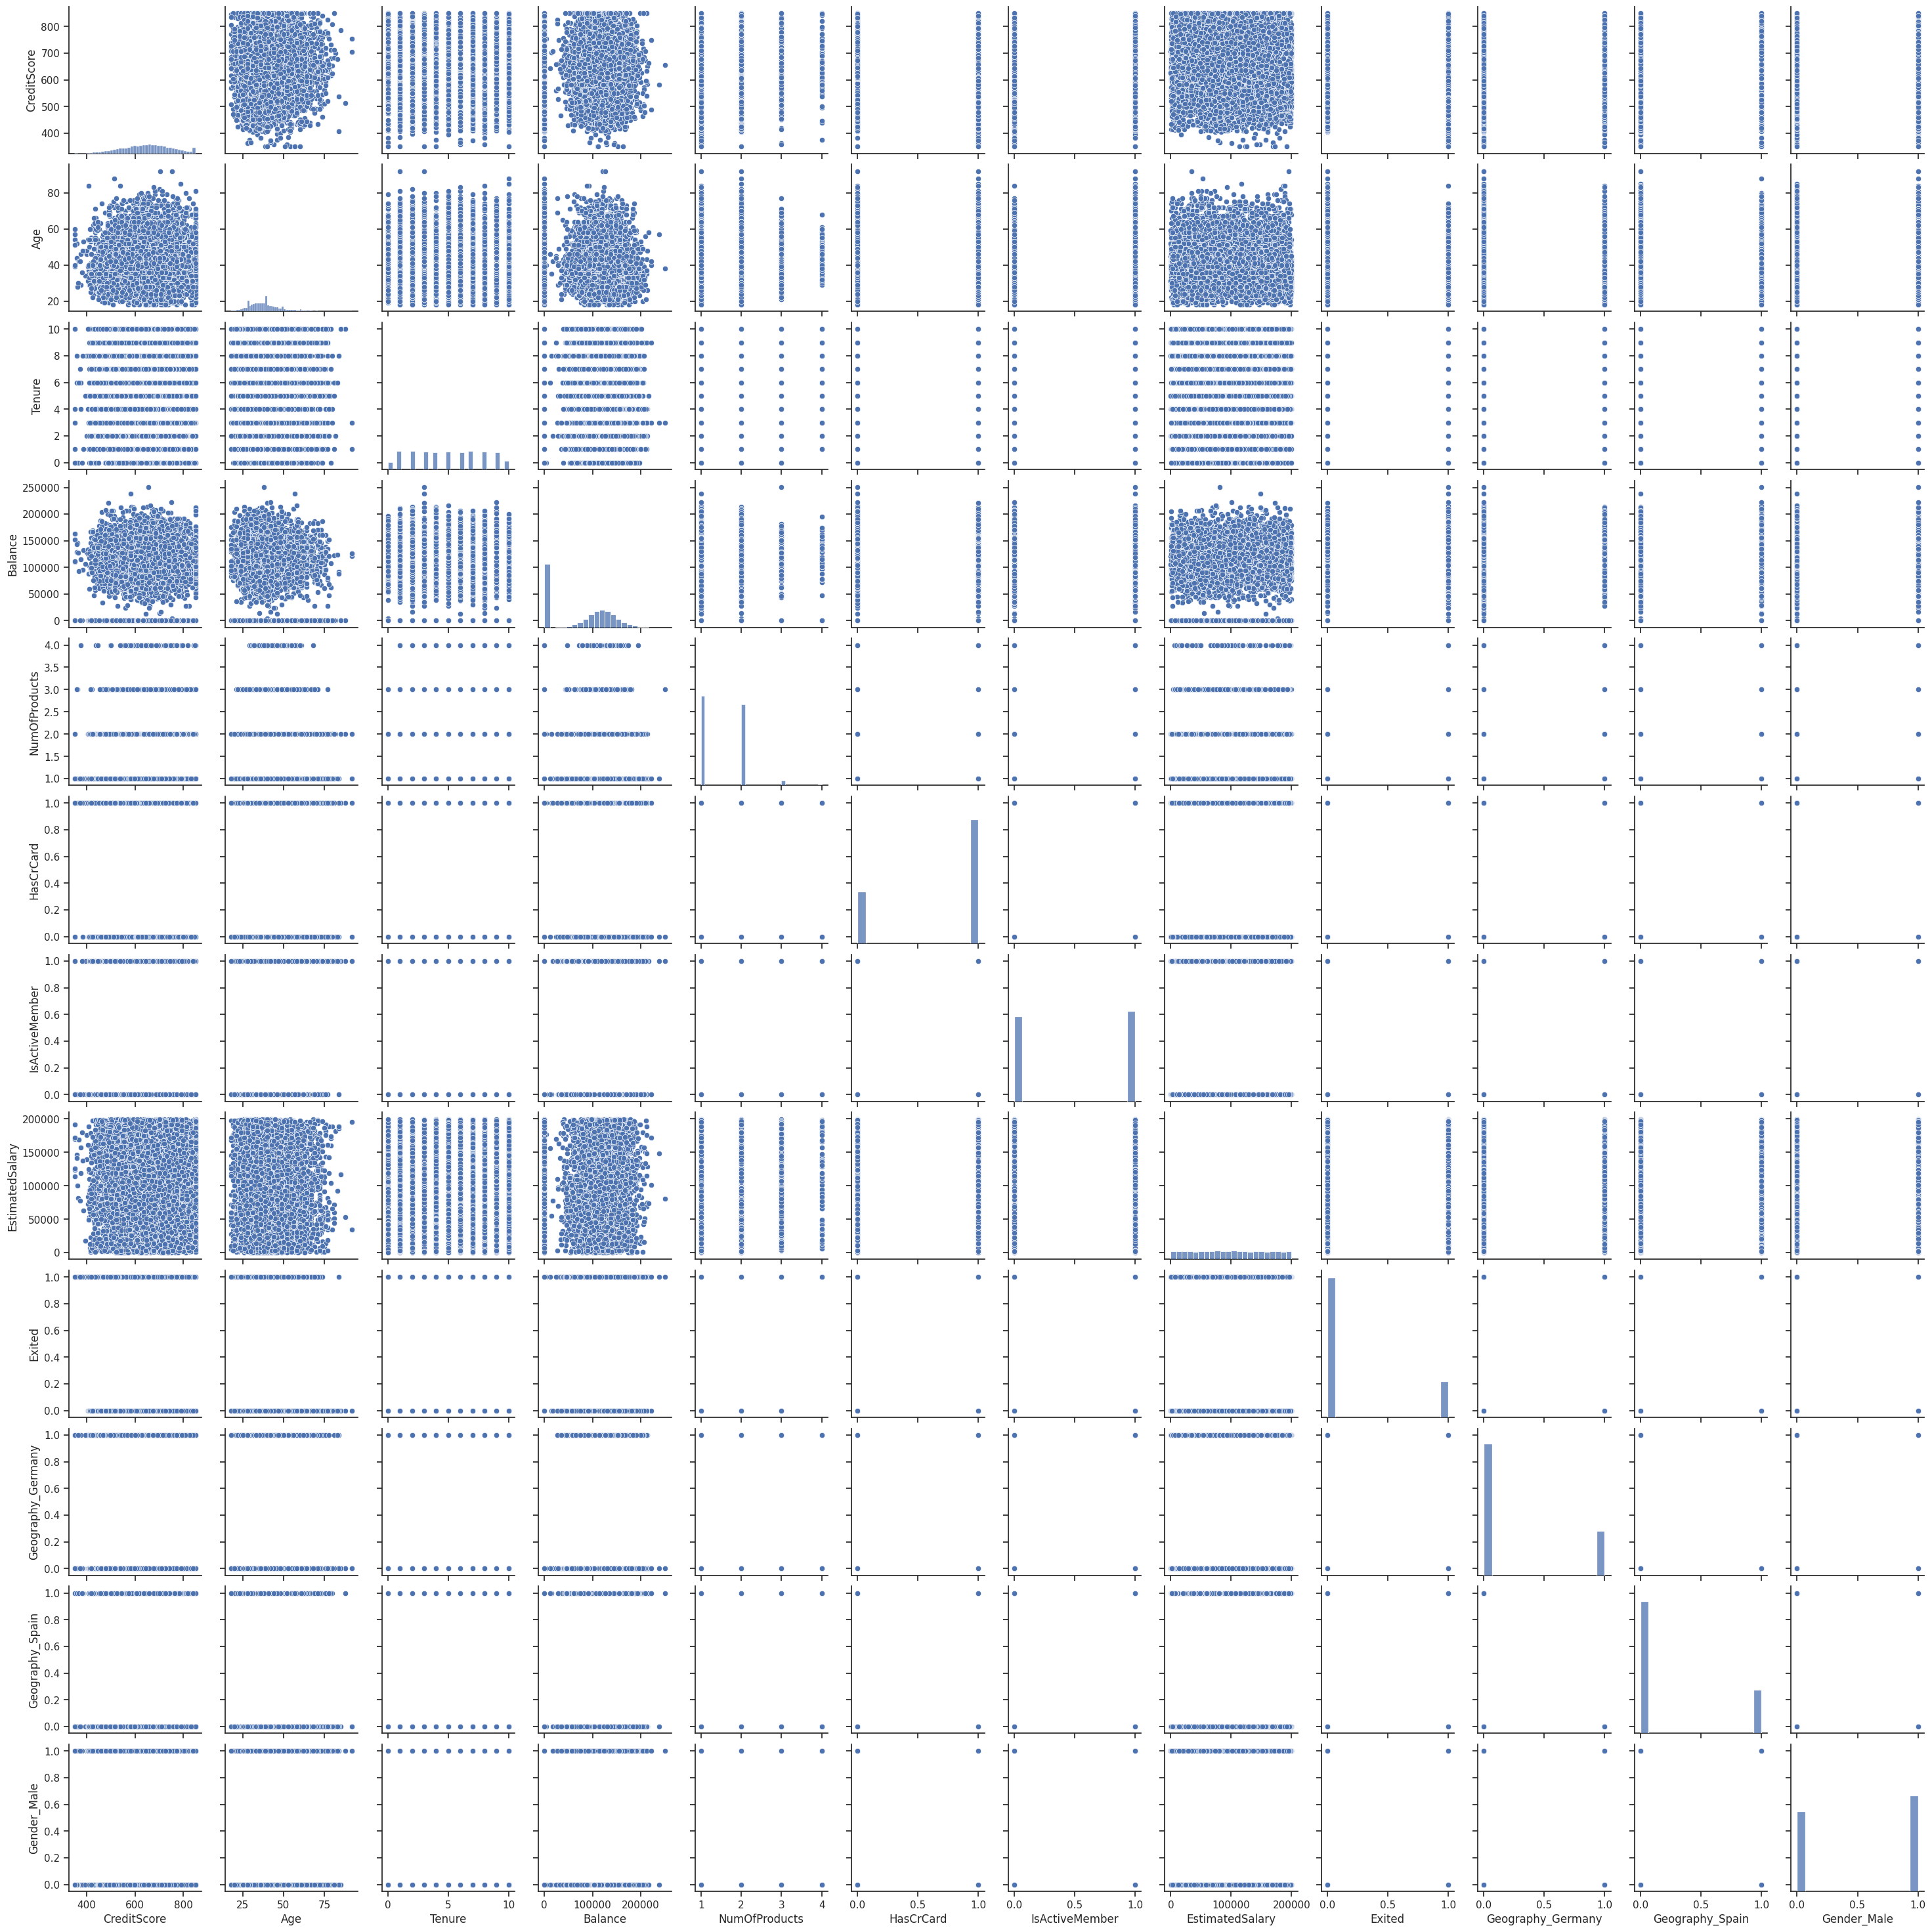

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(df)

## PCA

In [28]:
!pip install -q psynlig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.0/570.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00


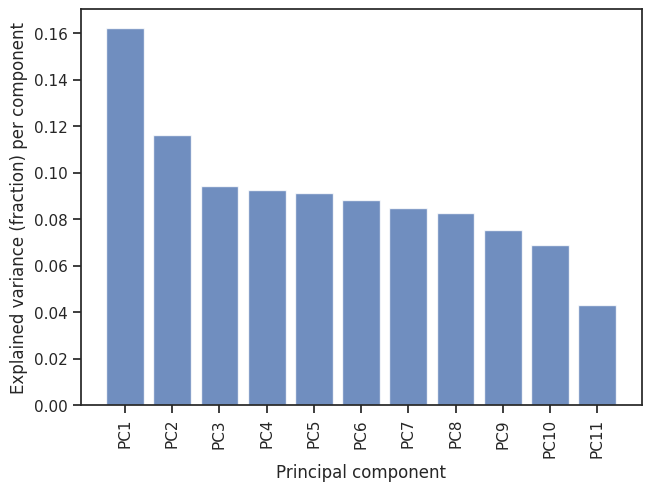

In [29]:
# PCA
from sklearn.decomposition import PCA
from psynlig import pca_explained_variance_bar

pca = PCA()
X_SMOTE_pca = pca.fit_transform(X_SMOTE_std)
pca.explained_variance_ratio_

col_names = X_SMOTE.columns

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

X_SMOTE_pca = pd.DataFrame(X_SMOTE_pca)
X_SMOTE_pca.columns = col_names

## Feature Importance

In [30]:
X_SMOTE_std = pd.DataFrame(X_SMOTE_std)
X_SMOTE_std.columns=X_SMOTE.columns

<BarContainer object of 11 artists>

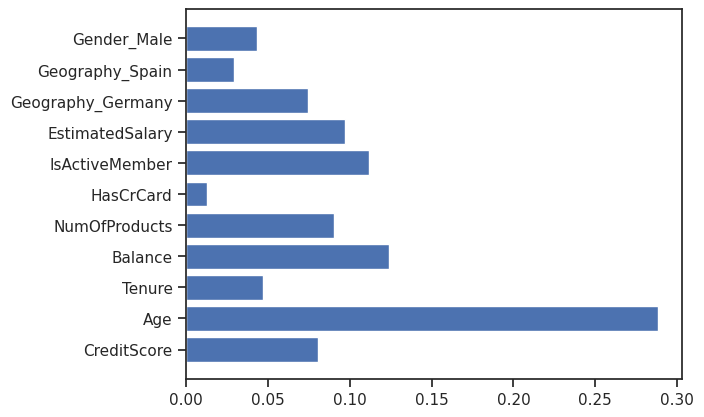

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_SMOTE_std, y_SMOTE)
col_names = X_SMOTE_std.columns
plt.barh(col_names, rf.feature_importances_)

## Recursive Feature Elimination (RFE)

In [32]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier())
_ = rfe.fit(X_SMOTE_std,y_SMOTE)
print('Important Features\n',X_SMOTE_std.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X_SMOTE_std), y_SMOTE)
print("\n Accuracy: ",rf.score(rfe.transform(X_SMOTE_std), y_SMOTE))

Important Features
 Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')

 Accuracy:  1.0


# Classification

## Data Split

In [33]:
# Split data into training and test data
x1_train, x1_test,y1_train,y1_test = train_test_split(X_SMOTE_std, y_SMOTE, test_size=0.2, random_state=0) 

## Low Code: PyCaret

In [34]:
!pip install pycaret
from pycaret.classification import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00


In [35]:
#Low-Code PyCaret code
# Combine the predictor dataframe X and target dataframe y to get df1
df1 = pd.concat([X, y], axis=1)

# Initialize PyCaret
clf = setup(data=df1, target='Exited')

# Compare multiple models and select the best one
best_model = compare_models(sort='AUC')

# Tune the model using a grid search
tuned_model = tune_model(best_model)

# Evaluate the performance of the tuned model
evaluate_model(tuned_model)

# Train the best model on the entire dataset
final_model = finalize_model(tuned_model)

# # Interpret final_model and plot the AUC curve
# plot_model(final_model, plot='auc')

,Description,Value
0,Session id,1208
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8637,0.8612,0.4706,0.7712,0.5842,0.5084,0.5308,1.0120
lightgbm,Light Gradient Boosting Machine,0.8604,0.8527,0.4965,0.7328,0.5915,0.5111,0.5255,0.3670
rf,Random Forest Classifier,0.8613,0.8468,0.4601,0.7663,0.5742,0.4976,0.5210,2.7110
ada,Ada Boost Classifier,0.8527,0.8442,0.4691,0.7092,0.5643,0.4802,0.4952,0.9090
xgboost,Extreme Gradient Boosting,0.8529,0.8378,0.4853,0.7016,0.5729,0.4877,0.5002,1.0000
et,Extra Trees Classifier,0.8517,0.8354,0.4341,0.7281,0.5429,0.4614,0.4838,1.1810
qda,Quadratic Discriminant Analysis,0.8341,0.8108,0.3879,0.6562,0.4865,0.3957,0.4156,0.2060
lda,Linear Discriminant Analysis,0.8143,0.7681,0.2223,0.6265,0.3274,0.2471,0.2924,0.0810
dt,Decision Tree Classifier,0.7936,0.6885,0.5112,0.4965,0.5031,0.3730,0.3735,0.3130
nb,Naive Bayes,0.7896,0.6191,0.0351,0.3335,0.0627,0.0264,0.0482,0.1490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8529,0.8592,0.4406,0.7326,0.5502,0.4687,0.4904
1,0.8586,0.8691,0.4755,0.7391,0.5787,0.4985,0.5160
2,0.8486,0.8314,0.4196,0.7229,0.5310,0.4482,0.4718
3,0.8643,0.8540,0.4755,0.7727,0.5887,0.5129,0.5346
4,0.8800,0.8803,0.5385,0.8105,0.6471,0.5783,0.5958
5,0.8714,0.8762,0.4965,0.7978,0.6121,0.5400,0.5618
6,0.8500,0.8449,0.4577,0.6989,0.5532,0.4677,0.4829
7,0.8686,0.8484,0.5000,0.7717,0.6068,0.5322,0.5503
8,0.8457,0.8231,0.4507,0.6809,0.5424,0.4542,0.4682


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
# Fit PyCaret classifier on training data
pycaret_clf = tuned_model.fit(x1_train, y1_train)

# Predict target values for test data
y1_hat = pycaret_clf.predict(x1_test)
y1_hat=pd.DataFrame(y1_hat)
cm = confusion_matrix(y1_test, y1_hat)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy) 

Confusion matrix
 [[1402  188]
 [ 233 1363]] 

Accuracy =  0.8678593848085373


In [37]:
# Show tuned_model
tuned_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1208, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

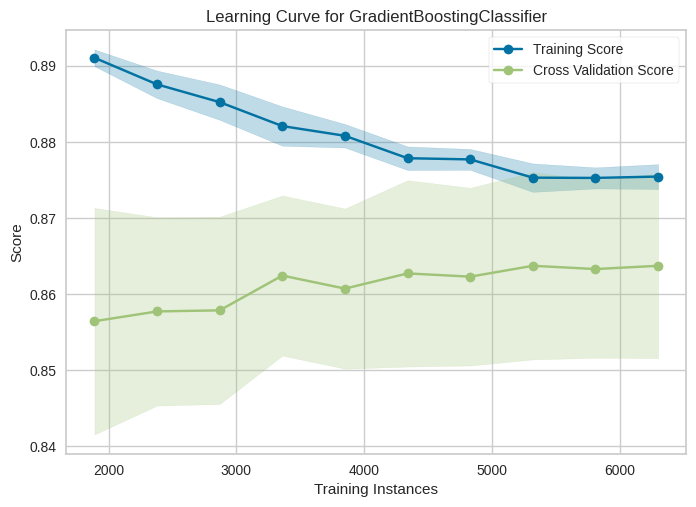

In [38]:
plot_model(tuned_model, plot = 'learning', use_train_data = True)

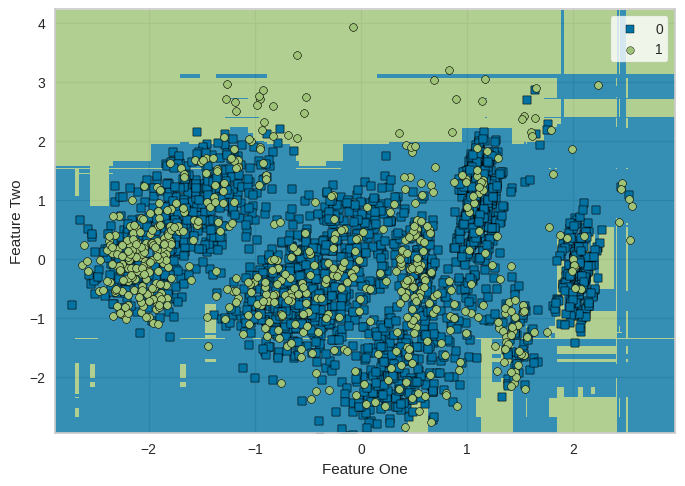

In [39]:
# Decision boundary using low-code
plot_model(tuned_model, plot = 'boundary', use_train_data = True)

## Classifers

In [41]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

In [42]:
from sklearn.model_selection import cross_val_score
names = ["Logistic Regression", "SVM (RBF kernel)", "k Nearest Neighbors", "Random Forest", "XGBoost", "Gaussian Naive Bayes", "Decision Tree", "MLP"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    KNeighborsClassifier(3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)]

for name, clf in zip(names, classifiers):
  pipe_many = make_pipeline(clf)
  clf.fit(x1_train, y1_train) 
  scores = cross_val_score(estimator=pipe_many,
                             X=x1_test,
                             y=np.ravel(y1_test),
                             cv=10,     #Reduced to three folds for execution speed
                             n_jobs=1,
                            scoring='roc_auc')
  print("Classifier: ",name)
  print(f'Accuracy: {clf.score(x1_test, y1_test)}')
  y_pred = clf.predict(x1_test)
  print(f'Balanced Accuracy: {balanced_accuracy_score(y1_test, y_pred)}')
  print('CV AUC scores: {}'.format(scores))
  print('CV AUC mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))
  print("\n\n")

Classifier:  Logistic Regression
Accuracy: 0.7793471437539234
Balanced Accuracy: 0.7793339480777415
CV AUC scores: [0.82460692 0.8740566  0.8620283  0.8851022  0.86808176 0.85790094
 0.80954076 0.87753649 0.88172936 0.85392192]
CV AUC mean:0.8594505260867846 and std:0.023481835523839648



Classifier:  SVM (RBF kernel)
Accuracy: 0.8499686126804771
Balanced Accuracy: 0.8499940889960751
CV AUC scores: [0.90208333 0.92940252 0.91981132 0.9341195  0.9221305  0.91977201
 0.86891341 0.91111902 0.91483723 0.90312883]
CV AUC mean:0.9125317679284839 and std:0.017480439873968072



Classifier:  k Nearest Neighbors
Accuracy: 0.8236032642812304
Balanced Accuracy: 0.8235837234595924
CV AUC scores: [0.84001572 0.8668239  0.86890723 0.85845126 0.84378931 0.83034591
 0.80738499 0.85680946 0.8651161  0.8561568 ]
CV AUC mean:0.8493800680352834 and std:0.0183342831808478



Classifier:  Random Forest
Accuracy: 0.8123038292529818
Balanced Accuracy: 0.8123386295928501
CV AUC scores: [0.8526533  0.89764151 

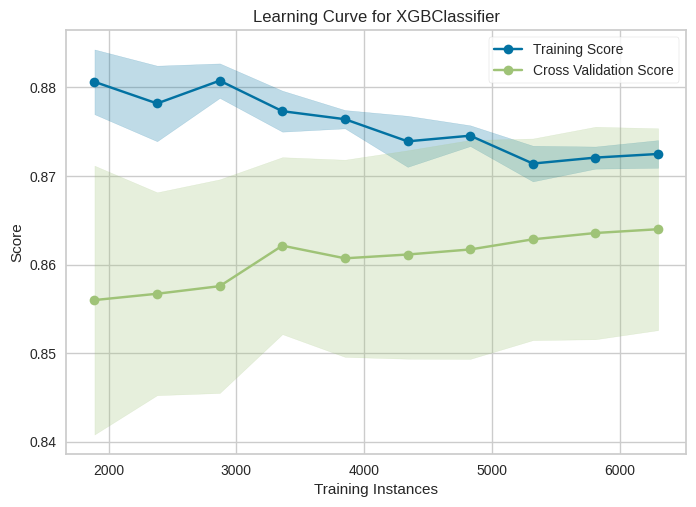

In [43]:
# choose the best classifier and create learning curve
plot_model(classifiers[4], plot = 'learning', use_train_data = True)

## PCA Classification

In [44]:
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_pca_train, y_pca_test =\
    train_test_split(X_SMOTE_pca, y_SMOTE, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0, 
                     stratify=y_SMOTE)
print('Shape of X and y',X_SMOTE_pca.shape, y_SMOTE.shape, '\nShape of training set X and y',X_pca_train.shape, y_pca_train.shape, '\nShape of test set X and y',X_pca_test.shape, y_pca_test.shape) 

Shape of X and y (15926, 11) (15926,) 
Shape of training set X and y (12740, 11) (12740,) 
Shape of test set X and y (3186, 11) (3186,)


In [45]:
y_pca_train.mean()

0.5

In [46]:
names = ["Logistic Regression", "SVM (RBF kernel)", "k Nearest Neighbors", "Random Forest", "XGBoost", "Gaussian Naive Bayes", "Decision Tree", "MLP"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=1),
    KNeighborsClassifier(3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)]

for name, clf in zip(names, classifiers):
  pipe_many = make_pipeline(clf)
  clf.fit(X_pca_train, y_pca_train) 
  scores = cross_val_score(estimator=pipe_many,
                             X=X_pca_test,
                             y=np.ravel(y_pca_test),
                             cv=10,     #Reduced to three folds for execution speed
                             n_jobs=1,
                            scoring='roc_auc')
  print("Classifier: ",name)
  print(f'Accuracy: {clf.score(X_pca_test, y_pca_test)}')
  y_pred = clf.predict(X_pca_test)
  print(f'Balanced Accuracy: {balanced_accuracy_score(y_pca_test, y_pred)}')
  print('CV AUC scores: {}'.format(scores))
  print('CV AUC mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))
  print("\n\n")

Classifier:  Logistic Regression
Accuracy: 0.7765222849968613
Balanced Accuracy: 0.7765222849968613
CV AUC scores: [0.86084906 0.87669025 0.84005503 0.86112421 0.86324686 0.84426101
 0.86824097 0.85870812 0.85918279 0.83750643]
CV AUC mean:0.8569864720541117 and std:0.011924792253555945



Classifier:  SVM (RBF kernel)
Accuracy: 0.8452605147520402
Balanced Accuracy: 0.8452605147520402
CV AUC scores: [0.91167453 0.91116352 0.91167453 0.92036164 0.90703616 0.87696541
 0.91566789 0.91527234 0.92353942 0.91309679]
CV AUC mean:0.910645222696887 and std:0.012095698725562406



Classifier:  k Nearest Neighbors
Accuracy: 0.8195229127432517
Balanced Accuracy: 0.8195229127432517
CV AUC scores: [0.84147013 0.84705189 0.82930425 0.86183176 0.84390723 0.83176101
 0.88016692 0.86246588 0.84614928 0.85518769]
CV AUC mean:0.8499296037538071 and std:0.014583106002068356



Classifier:  Random Forest
Accuracy: 0.7718141870684243
Balanced Accuracy: 0.7718141870684243
CV AUC scores: [0.8540684  0.88875786

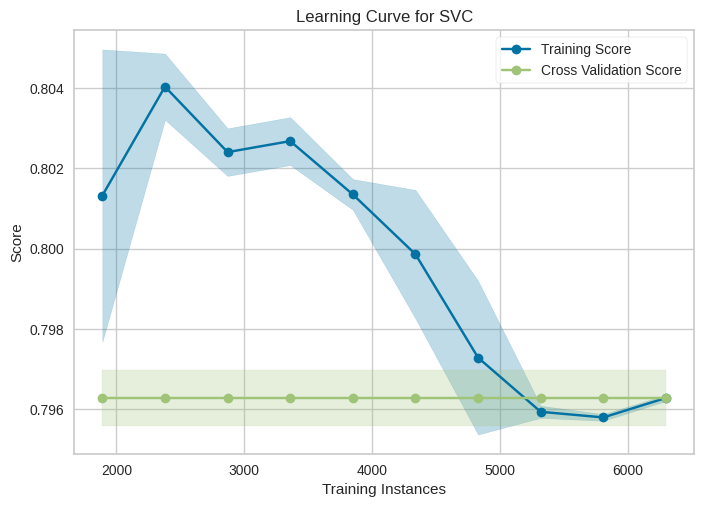

In [47]:
# choose the best classifier and create learning curve
plot_model(classifiers[1], plot = 'learning', use_train_data = True)

## Grid Search

In [48]:
# get the best parameters
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# define the hyperparameters to search
params = {'n_estimators': [50, 100, 200],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.1, 0.01, 0.001]}

# create an instance of the XGBClassifier model
xgb = XGBClassifier()

# create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5)
grid_search.fit(x1_train, y1_train)

# print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score:  0.9020408163265307


In [49]:
# Choose the best parameters
names = ["XG Boost"]

classifiers = [
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=200, max_depth=7)]

for name, clf in zip(names, classifiers):
  pipe_many = make_pipeline(clf)
  clf.fit(x1_train, y1_train) 
  scores = cross_val_score(estimator=pipe_many,
                             X=x1_test,
                             y=np.ravel(y1_test),
                             cv=10,     #Reduced to three folds for execution speed
                             n_jobs=1,
                            scoring='roc_auc')
  print("Classifier: ",name)
  print(f'Accuracy: {clf.score(x1_test, y1_test)}')
  y_pred = clf.predict(x1_test)
  print(f'Balanced Accuracy: {balanced_accuracy_score(y1_test, y_pred)}')
  print('CV AUC scores: {}'.format(scores))
  print('CV AUC mean:{} and std:{}'.format(np.mean(scores), np.std(scores)))
  print("\n\n")

Classifier:  XG Boost
Accuracy: 0.8973634651600754
Balanced Accuracy: 0.8973979760722561
CV AUC scores: [0.94650157 0.95617138 0.95345912 0.94701258 0.94960692 0.94937107
 0.93018472 0.93912424 0.94292156 0.93299316]
CV AUC mean:0.9447346327281357 and std:0.008029872750511015





# XAI

## Similar model

Text(0.5, 0, 'Random Forest SIMILAR Model Feature Importance')

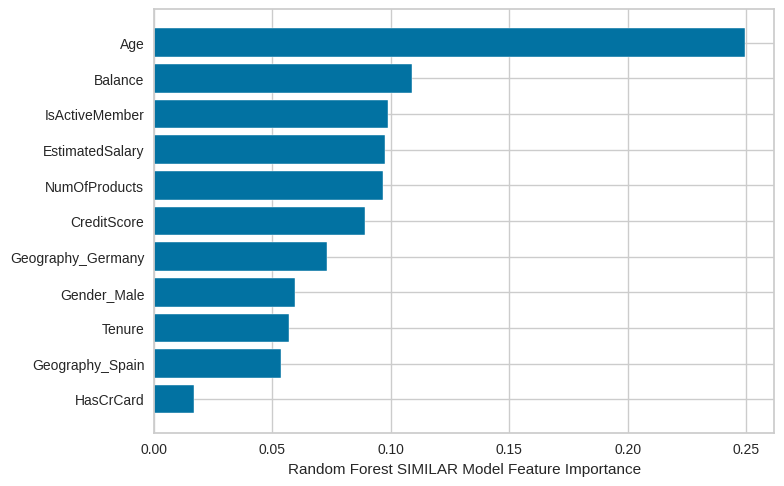

In [50]:
# Fit Random Forest SIMILAR model, recover feature importances
clf1=RandomForestClassifier()
clf1.fit(X_SMOTE_std,np.ravel(y_SMOTE))
sorted_idx = clf1.feature_importances_.argsort()
sorted_cols = [cols[i] for i in sorted_idx]
plt.barh(sorted_cols, clf1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest SIMILAR Model Feature Importance")

## Surrogate model

Text(0.5, 0, 'Random Forest SURROGATE/PROXY Model Feature Importance')

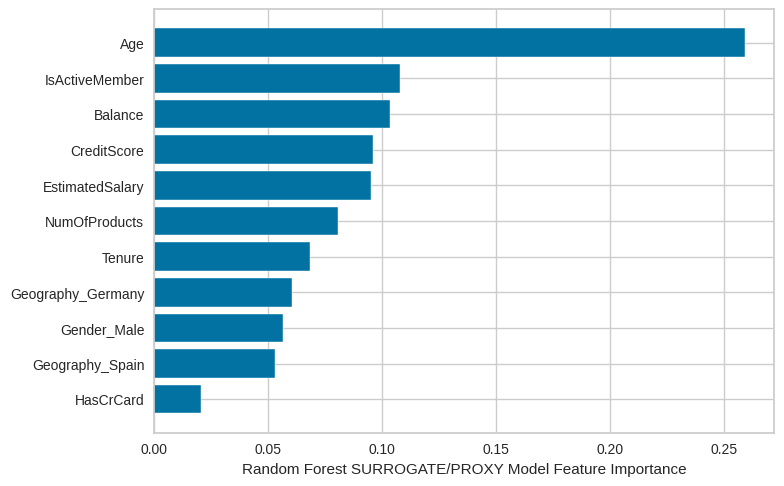

In [51]:
# Fit Random Forest SIMILAR model, recover feature importances
clf2=RandomForestClassifier()
clf2.fit(x1_test,np.ravel(y1_test))
sorted_idx = clf2.feature_importances_.argsort()
sorted_cols = [cols[i] for i in sorted_idx]
plt.barh(sorted_cols, clf2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest SURROGATE/PROXY Model Feature Importance")

### Shapley values

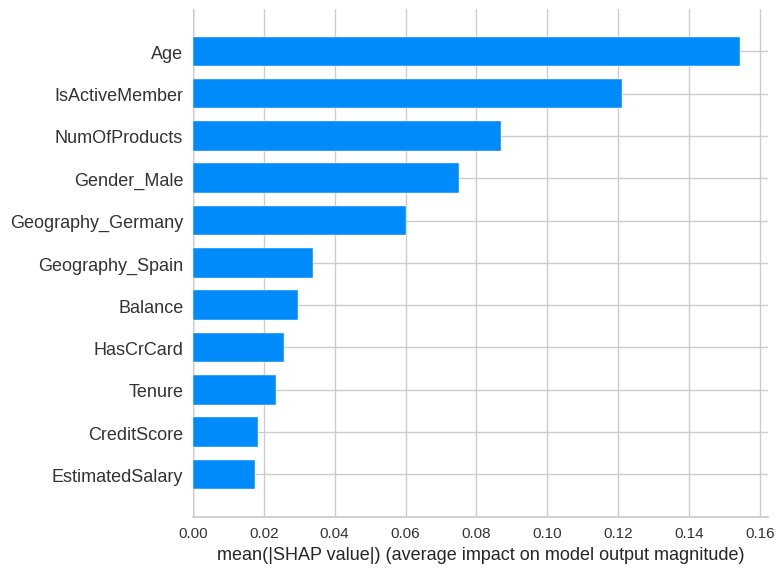

In [52]:
explainer = shap.TreeExplainer(clf2)
shap_values = explainer.shap_values(x1_test)
shap.summary_plot(shap_values[1], x1_test, plot_type='bar',feature_names=cols)

### Partial Dependence Plots

<Figure size 3000x2500 with 0 Axes>

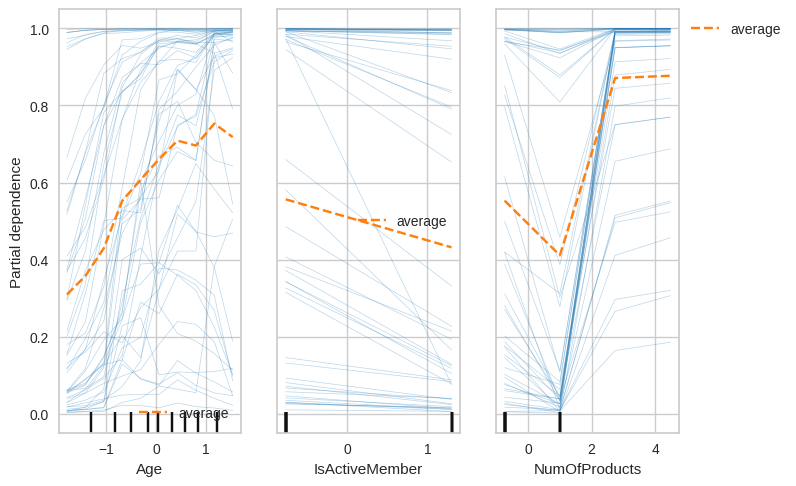

In [53]:
# Univariate Partial Dependence Plot
n = 50
fig = plt.figure(figsize=(30, 25))
pdp_features = ['Age','IsActiveMember','NumOfProducts']
PartialDependenceDisplay.from_estimator(
  clf, X_SMOTE_std, pdp_features, kind="both", n_jobs=3, subsample=n, grid_resolution=10)
plt.legend(bbox_to_anchor=(1,1));

### Decision Tree surrogate model

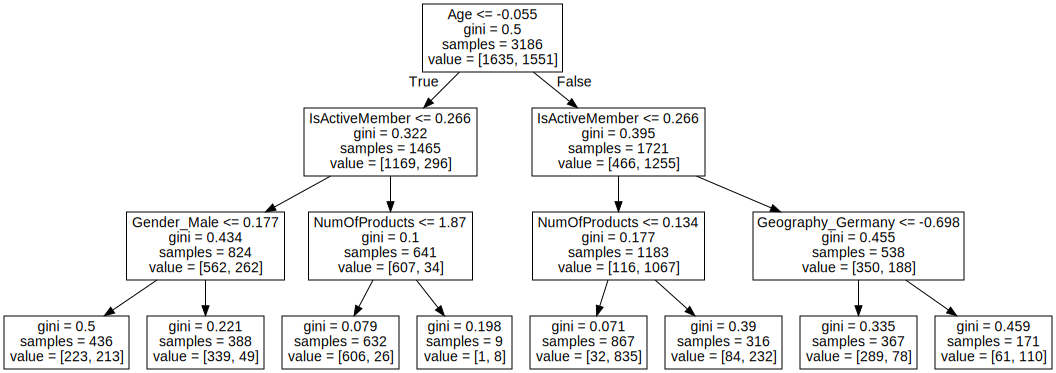

In [54]:
# Decision Tree surrogate model of Random Forest model
from sklearn import tree
import graphviz

proxy = DecisionTreeClassifier(random_state = 20850,max_depth=3)    # Control the depth of the proxy tree here
proxy.fit(x1_test,y1_hat)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = cols)
graphviz.Source(tree_graph)

# Auto-Sklearn

In [60]:
!pip install auto-sklearn
!pip install --upgrade auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import autosklearn.classification

In [68]:
# Create Auto-Sklearn classifier
clf = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60, per_run_time_limit=30)
clf.fit(x1_train, y1_train) 
# summarize
print(clf.sprint_statistics())
# evaluate best model
y_pred = clf.predict(x1_test)
print(f'AUC: {roc_auc_score(y1_test, y_pred)}')
print(f'Accuracy: {clf.score(x1_test, y1_test)}')

[WARNING] [2023-05-17 22:23:42,101:Client-AutoML(1):78cdbd1e-f501-11ed-80de-0242ac1c000c] Capping the per_run_time_limit to 28.0 to have time for a least 2 models in each process.
auto-sklearn results:
  Dataset name: 78cdbd1e-f501-11ed-80de-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.887515
  Number of target algorithm runs: 5
  Number of successful target algorithm runs: 3
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

AUC: 0.8751052158698633
Accuracy: 0.8750784682988073
